In [30]:
import pandas as pd
import lime

import sklearn
import sklearn.ensemble
import sklearn.metrics
import numpy as np

In [2]:
df = pd.read_csv('../data/migraine.csv')
pd.set_option('display.float_format', '{:0.2f}'.format)

In [3]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]
y = df['Type']

#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [4]:
from sklearn.naive_bayes import CategoricalNB

gnb = CategoricalNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [5]:
from sklearn.metrics import classification_report

y_pred = gnb.predict(X_test)

print(classification_report(y_true = y_test, y_pred = y_pred))

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.62      0.77         8
 Familial hemiplegic migraine       0.60      0.60      0.60         5
        Migraine without aura       0.91      0.91      0.91        11
                        Other       1.00      1.00      1.00         4
 Sporadic hemiplegic migraine       1.00      0.20      0.33         5
   Typical aura with migraine       0.88      0.98      0.93        62
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.89       100
                    macro avg       0.91      0.76      0.79       100
                 weighted avg       0.90      0.89      0.88       100



In [6]:

class_labels = gnb.classes_
class_probabilities = dict(zip(class_labels, gnb.predict_proba(X_test)[0]))
print(class_probabilities)

{'Basilar-type aura': 0.8878884636940544, 'Familial hemiplegic migraine': 0.086028386551334, 'Migraine without aura': 5.710083762708755e-05, 'Other': 0.008497252119480917, 'Sporadic hemiplegic migraine': 0.001305319051303602, 'Typical aura with migraine': 0.015614364950680094, 'Typical aura without migraine': 0.0006091127955203756}


In [7]:


#from lime.lime_text import LimeTextExplainer
#explainer = LimeTextExplainer(class_names=class_labels)



In [8]:
from lime.lime_tabular import LimeTabularExplainer

# Stwórz explainer z danych treningowych (potrzebuje surowych, nieprzeskalowanych danych)
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # nieprzeskalowane dane treningowe, jeśli dostępne
    feature_names=df.columns[:-1].tolist(),  # nazwy cech
    class_names=class_labels,  # nazwy klas
    mode='classification'  # dla zadania klasyfikacji
)

In [9]:
print(class_probabilities.keys())

dict_keys(['Basilar-type aura', 'Familial hemiplegic migraine', 'Migraine without aura', 'Other', 'Sporadic hemiplegic migraine', 'Typical aura with migraine', 'Typical aura without migraine'])


In [10]:
print(class_labels)

['Basilar-type aura' 'Familial hemiplegic migraine'
 'Migraine without aura' 'Other' 'Sporadic hemiplegic migraine'
 'Typical aura with migraine' 'Typical aura without migraine']


[('Paresthesia > 0.00', 0.005932565905546066), ('Character <= 1.00', -0.004230749184229148), ('Location <= 1.00', -0.0032839872488986824), ('Duration > 2.00', 0.0017050525825229347), ('2.00 < Intensity <= 3.00', 0.0012077860168692482), ('Age <= 22.00', 0.0006406009819671922), ('Visual > 2.00', -0.0005515057350705348), ('Visual_defect <= 0.00', -0.000550961317125867), ('Dysarthria <= 0.00', 0.00042796797692963774), ('Vertigo > 0.00', 0.0002963090615379306), ('Frequency <= 1.00', -0.0002655264334324497), ('Dysphasia <= 0.00', 0.00018962502044136956), ('Sensory > 0.00', -0.00018724384795215714), ('Hypoacusis <= 0.00', 0.00016150304011782395), ('0.00 < DPF <= 1.00', 8.426299416535131e-05), ('Diplopia <= 0.00', -4.2478534536608074e-05), ('Conscience <= 0.00', 3.721384441958915e-05), ('Tinnitus <= 0.00', 6.972513129209766e-06), ('Vomit <= 0.00', 4.891340380177387e-06), ('Ataxia <= 0.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0), ('Nausea <= 1.00', 0.0)]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

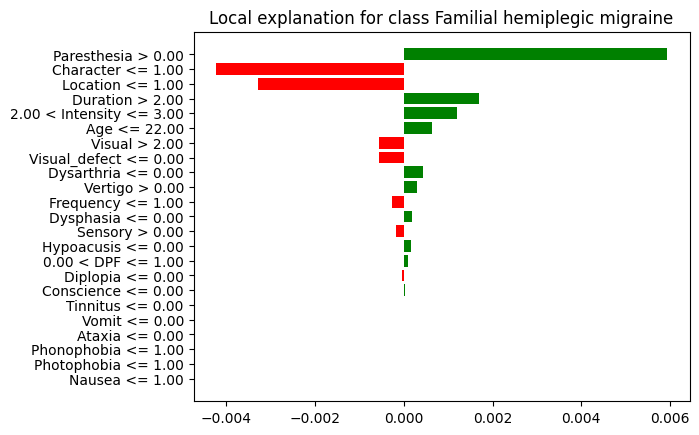

In [11]:
instance_index = 0  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba, # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [12]:
exp.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('Character <= 1.00', -0.005331592351762527), ('Location <= 1.00', -0.004180176882253934), ('2.00 < Frequency <= 4.00', 0.0013567857154021933), ('Paresthesia <= 0.00', -0.0012727899167649598), ('Intensity <= 2.00', -0.0012432007196906188), ('1.00 < Visual <= 2.00', 0.000912250824043191), ('Duration <= 1.00', -0.0007343649999570955), ('Age > 40.00', -0.0005682275908797259), ('Sensory <= 0.00', 0.0003251597748482259), ('Visual_defect <= 0.00', 0.0002823476068041571)]


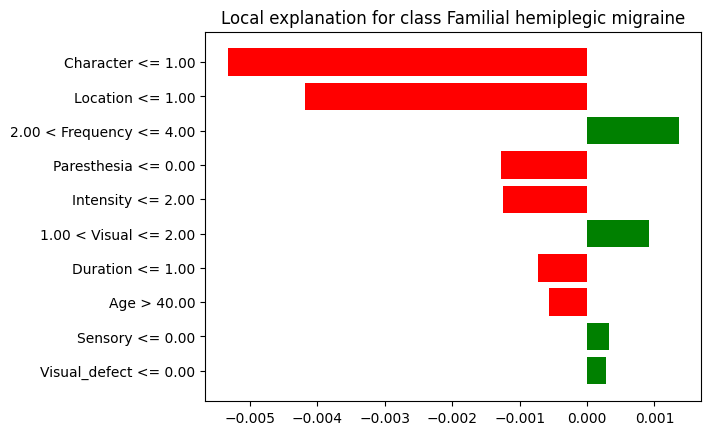

In [13]:
instance_index = 1  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [14]:
exp.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('Character <= 1.00', -0.005355529015707197), ('Location <= 1.00', -0.003473834702909866), ('2.00 < Intensity <= 3.00', 0.0011877241077858825), ('Duration <= 1.00', -0.0007928557673493876), ('Visual <= 1.00', -0.0006364116423675618), ('29.00 < Age <= 40.00', -0.0005208521973273501), ('Sensory > 0.00', -0.00027798512567527505), ('Dysphasia <= 0.00', 0.00019069265366152772), ('Visual_defect <= 0.00', 0.00013358576429865337), ('DPF <= 0.00', 0.00013221919978872372), ('1.00 < Frequency <= 2.00', -0.00010795891789975491), ('Diplopia <= 0.00', -0.00010675023818551976), ('Vertigo <= 0.00', 8.902533310817658e-05), ('Dysarthria <= 0.00', 7.141414102371292e-05), ('Vomit <= 0.00', 6.643348663262864e-05), ('Hypoacusis <= 0.00', -1.5789253688554573e-05), ('Tinnitus <= 0.00', -8.996688104532782e-06), ('Paresthesia <= 0.00', 4.441026225405809e-06), ('Conscience <= 0.00', 4.358512479935635e-06), ('Nausea <= 1.00', 0.0), ('Phonophobia <= 1.00', 0.0), ('Photophobia <= 1.00', 0.0), ('Ataxia <= 0.00', 0.

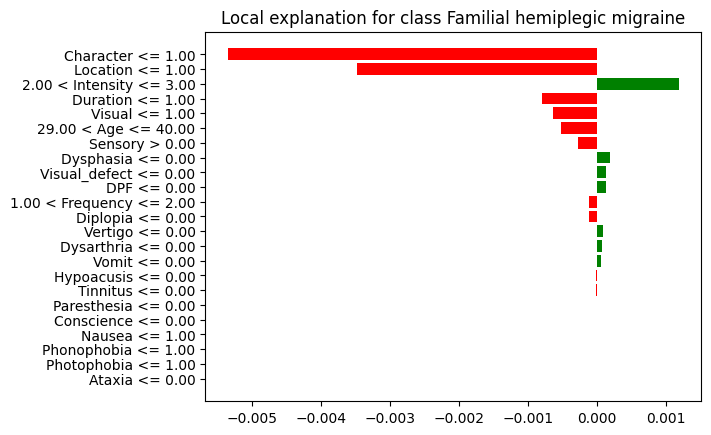

In [15]:
instance_index = 49  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba,  # funkcja predykcyjna modelu
    num_features=23
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure(label=1)

In [16]:
exp.show_in_notebook(show_predicted_value=True)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('Location <= 1.00', -0.005018625783132595), ('Character <= 1.00', -0.004434134181499006), ('Intensity <= 2.00', -0.0011587755177493127), ('Visual > 2.00', -0.0007390193291006712), ('Duration <= 1.00', -0.0006632150497001795), ('Age > 40.00', -0.0005125141672762899), ('Sensory > 0.00', -0.00034374053686091015), ('Visual_defect <= 0.00', 0.00033420066710364353), ('Dysarthria <= 0.00', 0.00031463125031743855), ('Hypoacusis <= 0.00', -0.00023530032975236522)]


/var/folders/07/ww1l5ht56ps_qjvqynpygtbh0000gn/T/ipykernel_23277/956228474.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


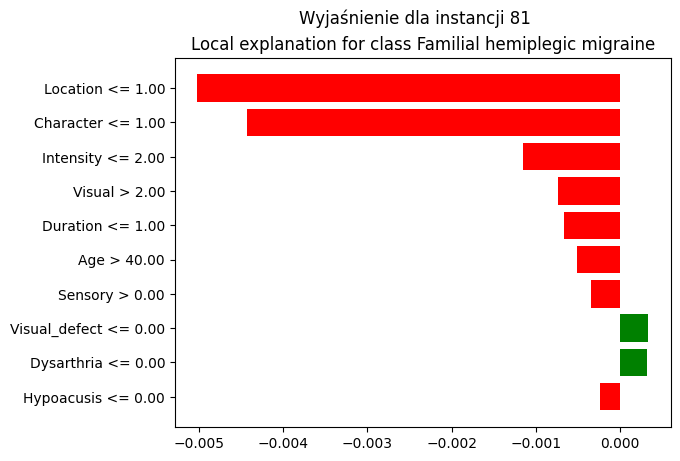

In [17]:
instance_index = 80  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = fig = exp.as_pyplot_figure()
fig.suptitle(f'Wyjaśnienie dla instancji {instance_index+1}')
plt.show()

In [18]:
exp.show_in_notebook()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

[('Character > 1.00', 0.005892713218119036), ('Location > 1.00', 0.004032863944228697), ('Duration > 2.00', 0.0018218473061621476), ('2.00 < Intensity <= 3.00', 0.0013283248441958988), ('Visual <= 1.00', -0.0006993920255103772), ('Age > 40.00', -0.0006481832962193521), ('Paresthesia <= 0.00', 0.0005651759625546125), ('Diplopia <= 0.00', 0.00046640884366997657), ('Frequency <= 1.00', -0.0003747738680171673), ('Sensory <= 0.00', 0.00031079637507507073)]


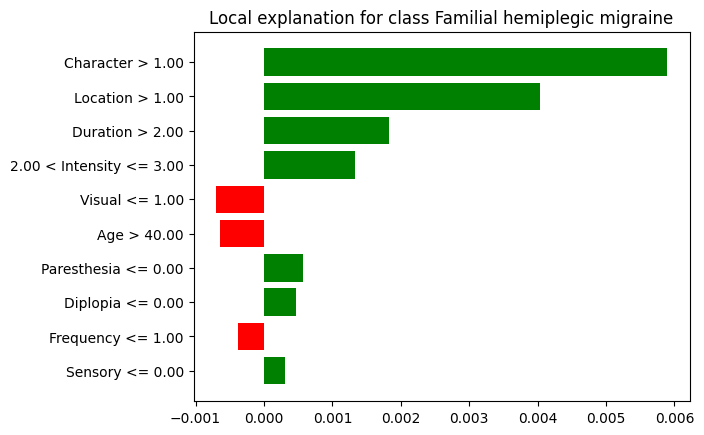

In [19]:
instance_index = 22  # index instancji do wyjaśnienia
exp = explainer.explain_instance(
    data_row=X_test.iloc[instance_index],  # dane instancji
    predict_fn=gnb.predict_proba  # funkcja predykcyjna modelu
)

# Wyświetl wyniki
print(exp.as_list())
plt = exp.as_pyplot_figure()

In [20]:
exp.show_in_notebook()

In [21]:
#print("Przewidywane klasy dla instancji:", gnb.predict(X_test[instance_index].reshape(1, -1)))


In [22]:
print(exp.top_labels)

None


In [23]:
probs = gnb.predict_proba(X_test)
class_labels = gnb.classes_
class_probabilities = []
for i in range(len(probs)):
    class_probabilities.append(dict(zip(class_labels, probs[i])))


In [24]:


for i in range(len(class_probabilities)):
    print(i, ":", y_pred[i])
    for klucz, wartosc in class_probabilities[i].items():
        print(f"{wartosc}: \t{klucz}")
    print(" ")

0 : Basilar-type aura
0.8878884636940544: 	Basilar-type aura
0.086028386551334: 	Familial hemiplegic migraine
5.710083762708755e-05: 	Migraine without aura
0.008497252119480917: 	Other
0.001305319051303602: 	Sporadic hemiplegic migraine
0.015614364950680094: 	Typical aura with migraine
0.0006091127955203756: 	Typical aura without migraine
 
1 : Typical aura with migraine
1.0844095236328973e-05: 	Basilar-type aura
0.000256084776523683: 	Familial hemiplegic migraine
3.7382299169130226e-05: 	Migraine without aura
9.709132259503369e-06: 	Other
0.00033471224636999475: 	Sporadic hemiplegic migraine
0.9993511622721301: 	Typical aura with migraine
1.0517831160873041e-07: 	Typical aura without migraine
 
2 : Typical aura with migraine
0.144870509653324: 	Basilar-type aura
0.3368795081082902: 	Familial hemiplegic migraine
0.024456446885692984: 	Migraine without aura
0.008734551874349891: 	Other
0.0003194695797191486: 	Sporadic hemiplegic migraine
0.4840239444435996: 	Typical aura with migraine
0

In [25]:
import shap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
shap.initjs()


In [34]:
def predict_proba(X):
    return gnb.predict_proba(X)

# Tworzenie wyjaśniacza KernelExplainer
# Tworzenie wyjaśniacza KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train)

# Obliczanie wartości SHAP dla całego zbioru danych testowych
shap_values = explainer.shap_values(X_test[0])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KeyError: 0

In [38]:
shap_values_array = np.array(shap_values)
print(f"shap_values_array shape: {shap_values_array.shape}")
print(f"X_test shape: {X_test.shape}")

shap_values_array shape: (100, 23, 7)
X_test shape: (100, 23)


In [42]:
# Tworzenie wykresu typu beeswarm
shap.summary_plot(shap_values[0][0], X_test[0], feature_names=class_labels)

KeyError: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.27s/it]


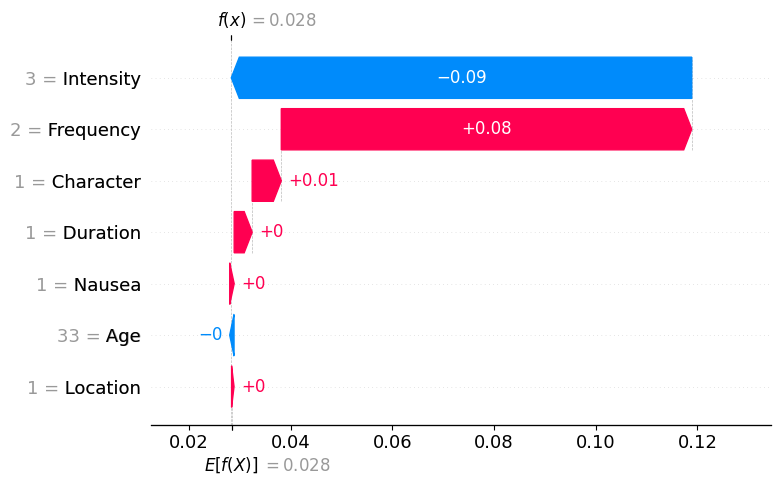

In [50]:
# Funkcja predykcyjna modelu
def predict_proba(X):
    return gnb.predict_proba(X)

# Tworzenie wyjaśniacza KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train)

# Wybór jednej instancji ze zbioru testowego
instance = X_test.iloc[49].values.reshape(1, -1)

# Obliczanie wartości SHAP dla wybranej instancji
shap_values = explainer.shap_values(instance)

# Tworzenie wykresu typu waterfall dla wybranej instancji i pierwszej klasy
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], 
                                     base_values=explainer.expected_value[0], 
                                     data=instance[0], 
                                     feature_names=df.columns))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


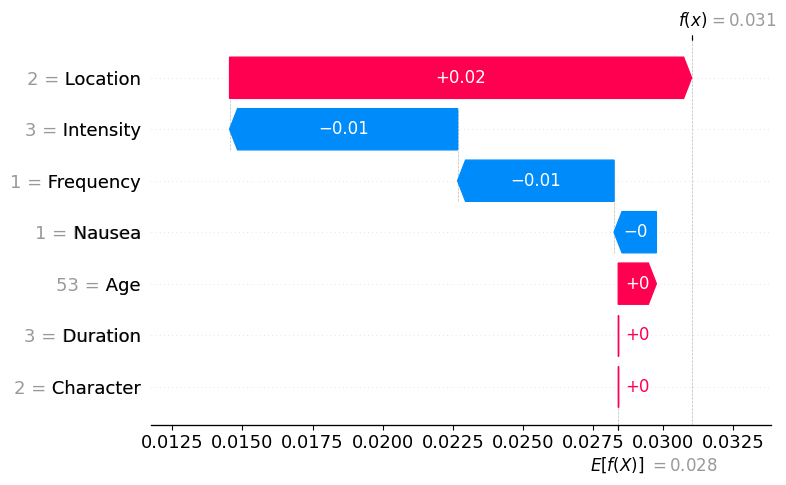

In [51]:
# Funkcja predykcyjna modelu
def predict_proba(X):
    return gnb.predict_proba(X)

# Tworzenie wyjaśniacza KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train)

# Wybór jednej instancji ze zbioru testowego
instance = X_test.iloc[22].values.reshape(1, -1)

# Obliczanie wartości SHAP dla wybranej instancji
shap_values = explainer.shap_values(instance)

# Tworzenie wykresu typu waterfall dla wybranej instancji i pierwszej klasy
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], 
                                     base_values=explainer.expected_value[0], 
                                     data=instance[0], 
                                     feature_names=df.columns))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
Using 300 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/1 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


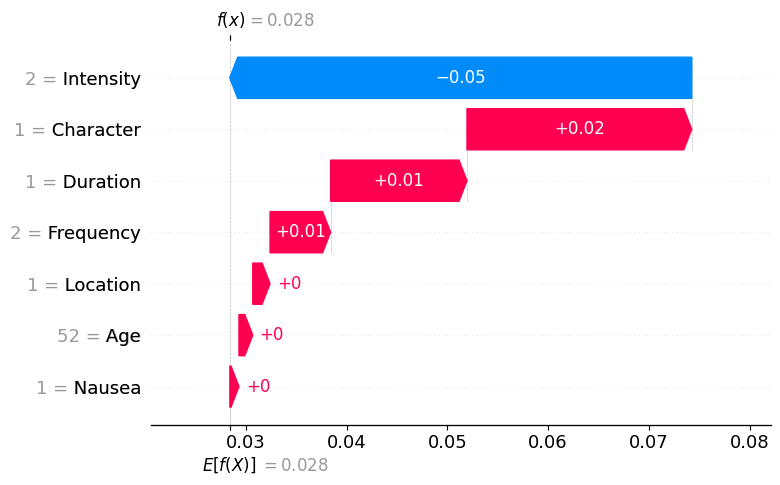

In [52]:
# Funkcja predykcyjna modelu
def predict_proba(X):
    return gnb.predict_proba(X)

# Tworzenie wyjaśniacza KernelExplainer
explainer = shap.KernelExplainer(predict_proba, X_train)

# Wybór jednej instancji ze zbioru testowego
instance = X_test.iloc[80].values.reshape(1, -1)

# Obliczanie wartości SHAP dla wybranej instancji
shap_values = explainer.shap_values(instance)

# Tworzenie wykresu typu waterfall dla wybranej instancji i pierwszej klasy
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], 
                                     base_values=explainer.expected_value[0], 
                                     data=instance[0], 
                                     feature_names=df.columns))